## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [3]:
df.shape

(247, 14)

In [4]:
df.loc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


## Removing unnecessary spaces

In [5]:
df.drop([122,123,124],inplace=True)

In [6]:
df.shape

(244, 14)

In [7]:
df.loc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [8]:
df["Region"] = 1                            # assigned Region=1 for Bejaia region and 0 for Sidi-Bel Abbes region

In [9]:
df.loc[125:,"Region"] = 0

In [10]:
df.loc[125:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0
128,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,0
129,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0


In [11]:
df.loc[:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,27,9,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,1
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,1


In [12]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].str.strip()

In [13]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0


In [14]:
df.columns = df.columns.str.replace(" ","")

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

## Getting an idea about dataset and finding null values

In [16]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 38.6+ KB


## Conversion of datatypes of columns

In [18]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0


## Changing datatype of columns for better EDA

In [19]:
d1 = {'day':int,'month':int,'year':int,'Temperature':float,'RH':int,'Ws':int,'Rain':float,'FFMC':float,'DMC':float,
      'DC':float,'ISI':float,'BUI':float,'FWI':float,'Classes':object,'Region':int}

In [20]:
df = df.astype(d1)

In [21]:
df.dtypes

day              int64
month            int64
year             int64
Temperature    float64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

## Assigning fire as 1 and not fire as 0

In [22]:
df.replace('fire',1,inplace=True)                                       # assigning fire as 1 and not fire as 0

In [23]:
df.replace('not fire',0,inplace=True)

In [24]:
df['Classes']

0      0
1      0
2      0
3      0
4      0
      ..
242    1
243    0
244    0
245    0
246    0
Name: Classes, Length: 244, dtype: int64

In [25]:
df.dtypes

day              int64
month            int64
year             int64
Temperature    float64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region           int64
dtype: object

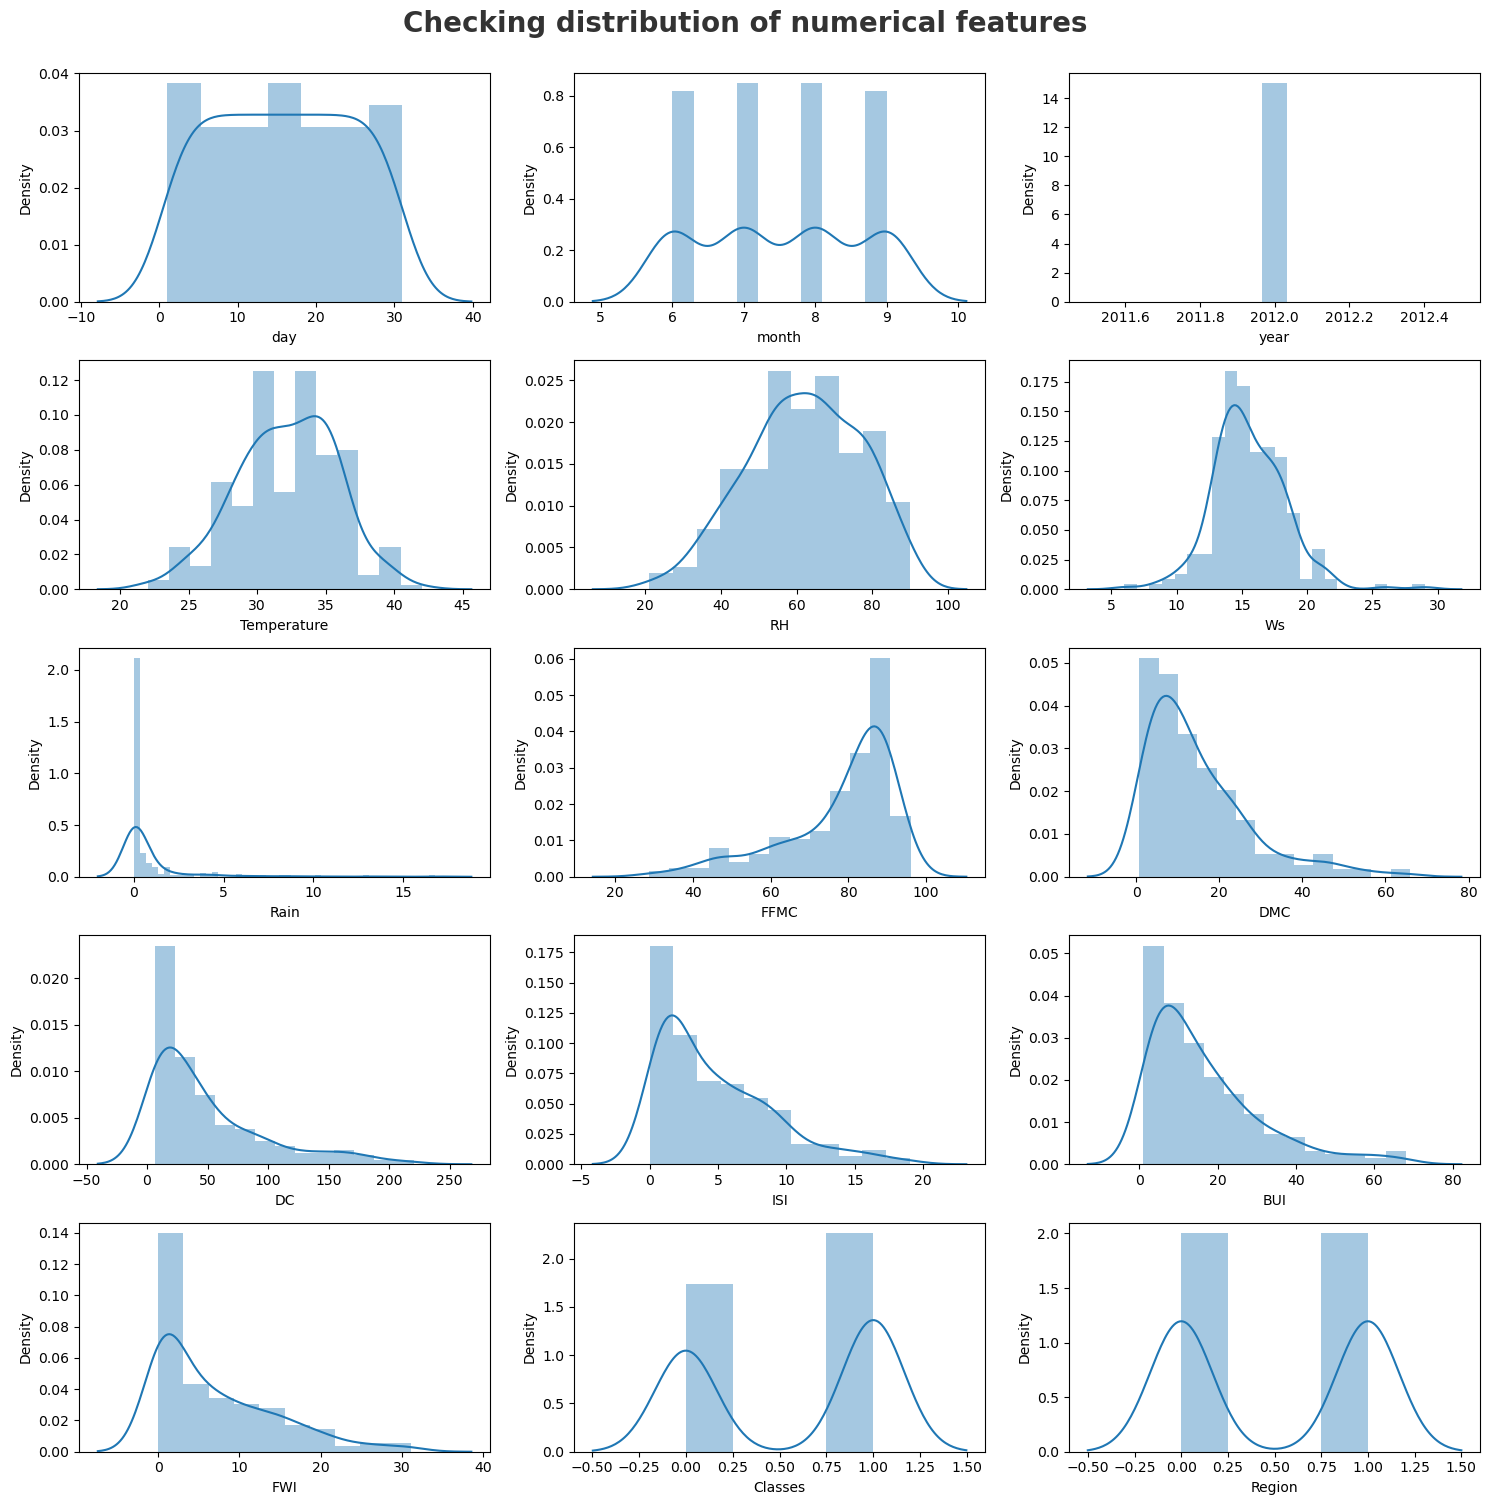

In [26]:
plt.figure(figsize=(15, 15))
plt.suptitle('Checking distribution of numerical features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(df.columns)):
    plt.subplot(5, 3, i+1)
    sns.distplot(x=df[df.columns[i]])
    plt.xlabel(df.columns[i])
    plt.tight_layout()

## Finding correlation between Class feature(fire or not fire) and other features

In [27]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.179301,0.517224,0.350234,0.201784,-4.662229e-16
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.063545,0.085567,0.081732,0.022333,6.718556e-17
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,0.518119,-2.734961e-01
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,-0.435023,4.064239e-01
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,-0.066529,1.768290e-01
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,-0.379449,4.108006e-02
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,0.770114,-2.246798e-01
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,0.584188,-1.910937e-01
DC,5.279285e-01,1.276719e-01,NaN,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,0.507122,8.148947e-02


### Report:

#### • As we can see Temperature is positively correlated to classes
#### • Also Fine fuel moisture code, duff mositure code, drought code and fire weather index (FFMC,DC,DMC,FWI) are highly positively correlated to classes
#### • RH is neagtively correlated to class feature and obviously rain is also negatively correlated

In [28]:
l= list(df.columns)

In [29]:
l

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'Region']

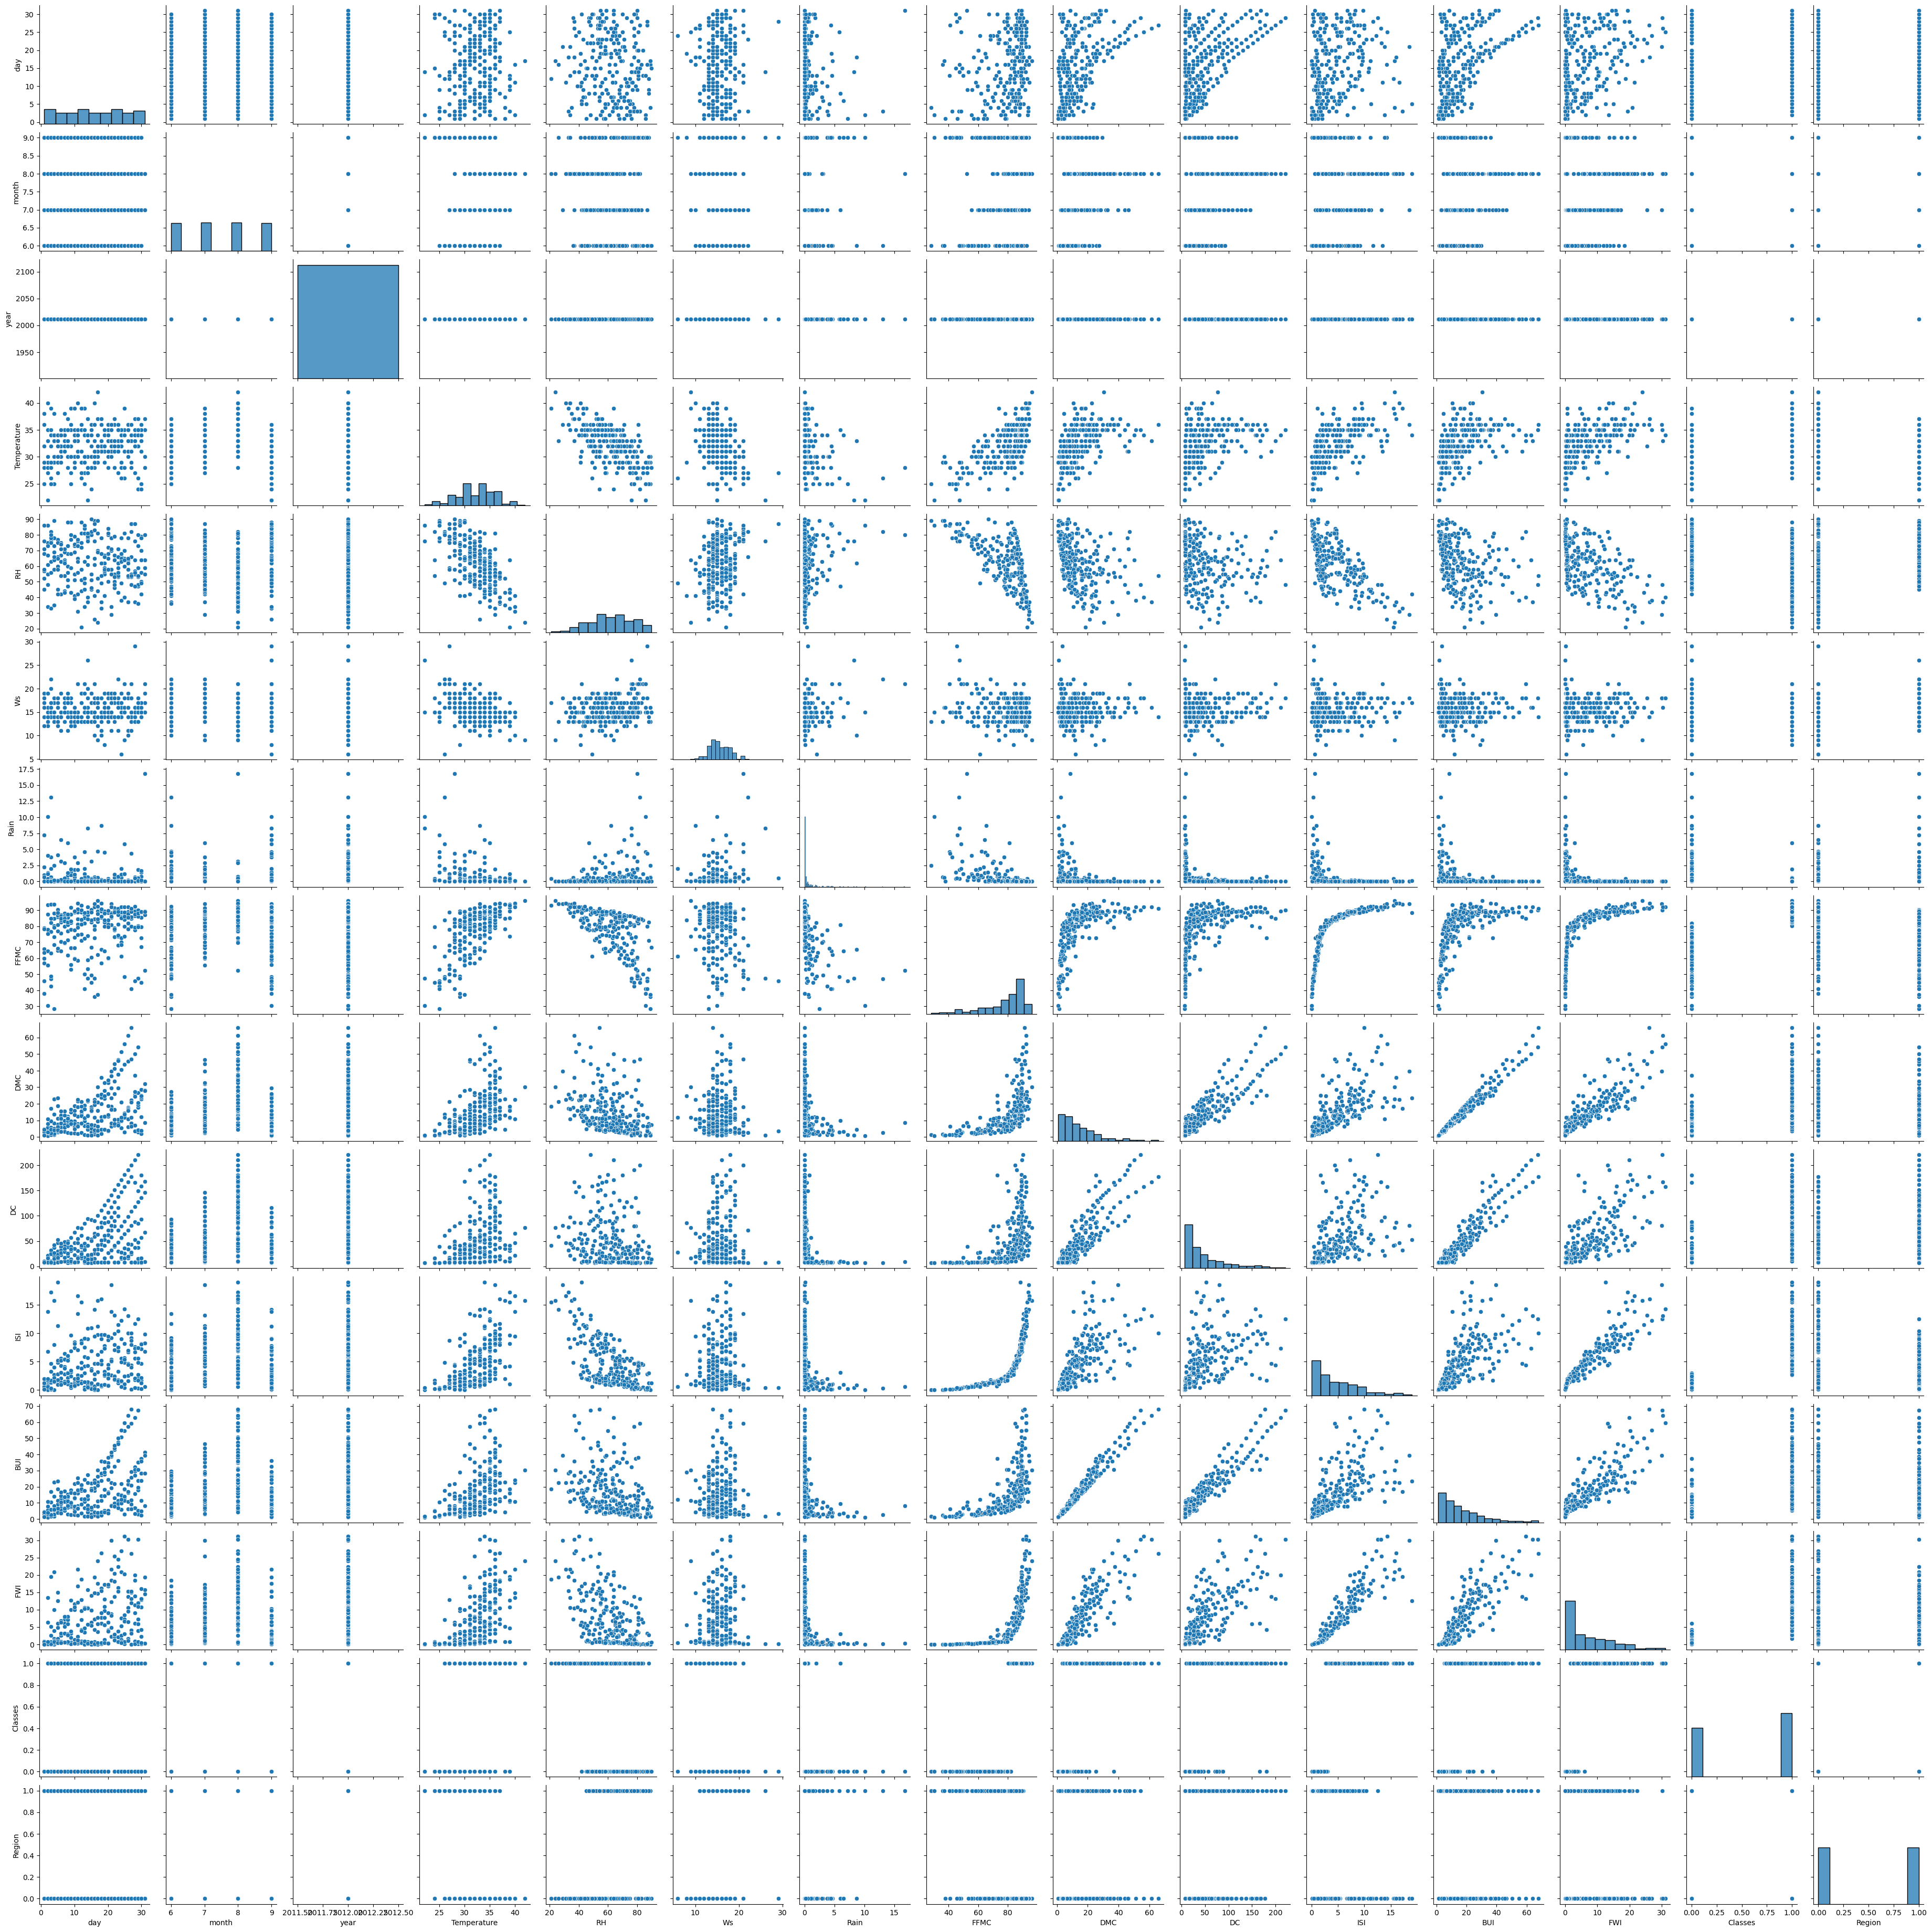

In [30]:
sns.pairplot(data=df)

In [31]:
df_bejaia = df[df['Region']==1]

In [32]:
df_sidibel = df[df['Region']==0]

## Analysis of Bejaia region

In [33]:
df_bejaia

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31.0,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,0,1
118,27,9,2012,31.0,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,1,1
119,28,9,2012,32.0,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,0,1
120,29,9,2012,26.0,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,0,1


In [34]:
df_bejaia['month'].unique()

array([6, 7, 8, 9])

In [35]:
avg_temps=[]
for i in df_bejaia['month'].unique():
    avg_temps.append(df_bejaia[(df_bejaia['month']==i) & (df_bejaia['Classes']==1)]['Temperature'].mean())

In [36]:
df_bejaia[(df_bejaia['month']==7) & (df_bejaia['Classes']==1)].shape

(15, 15)

In [37]:
# we have found out average temperatures for june, july, august andd september

In [38]:
avg_temps

[31.23076923076923, 32.86666666666667, 34.583333333333336, 30.142857142857142]

In [39]:
no_fire_ign = []
for i in df_bejaia['month'].unique():
    no_fire_ign.append(df_bejaia[(df_bejaia['month']==i) & (df_bejaia['Classes']==1)].shape[0])

In [40]:
no_fire_ign

[13, 15, 24, 7]

In [41]:
# we have found out number of fires for each month

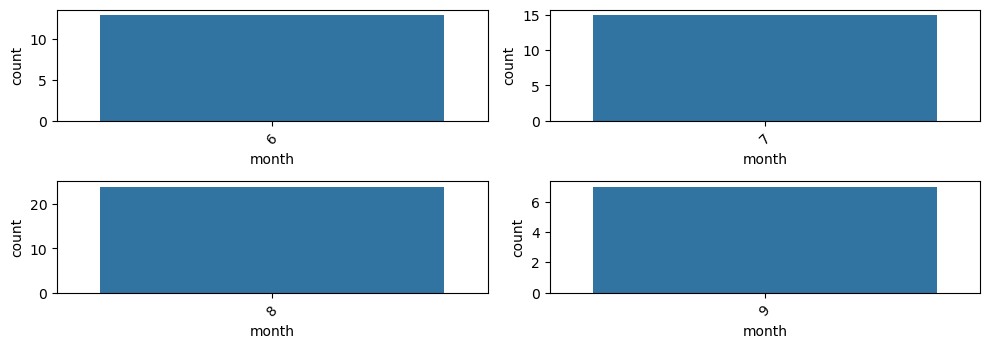

In [42]:
plt.figure(figsize=(10,10))
for i in df_bejaia['month'].unique():
    plt.subplot(6,2,i+1)
    sns.countplot(x=df_bejaia[(df_bejaia['month']==i)&(df_bejaia['Classes']==1)]['month'])
    plt.xticks(rotation=45)
    plt.tight_layout()

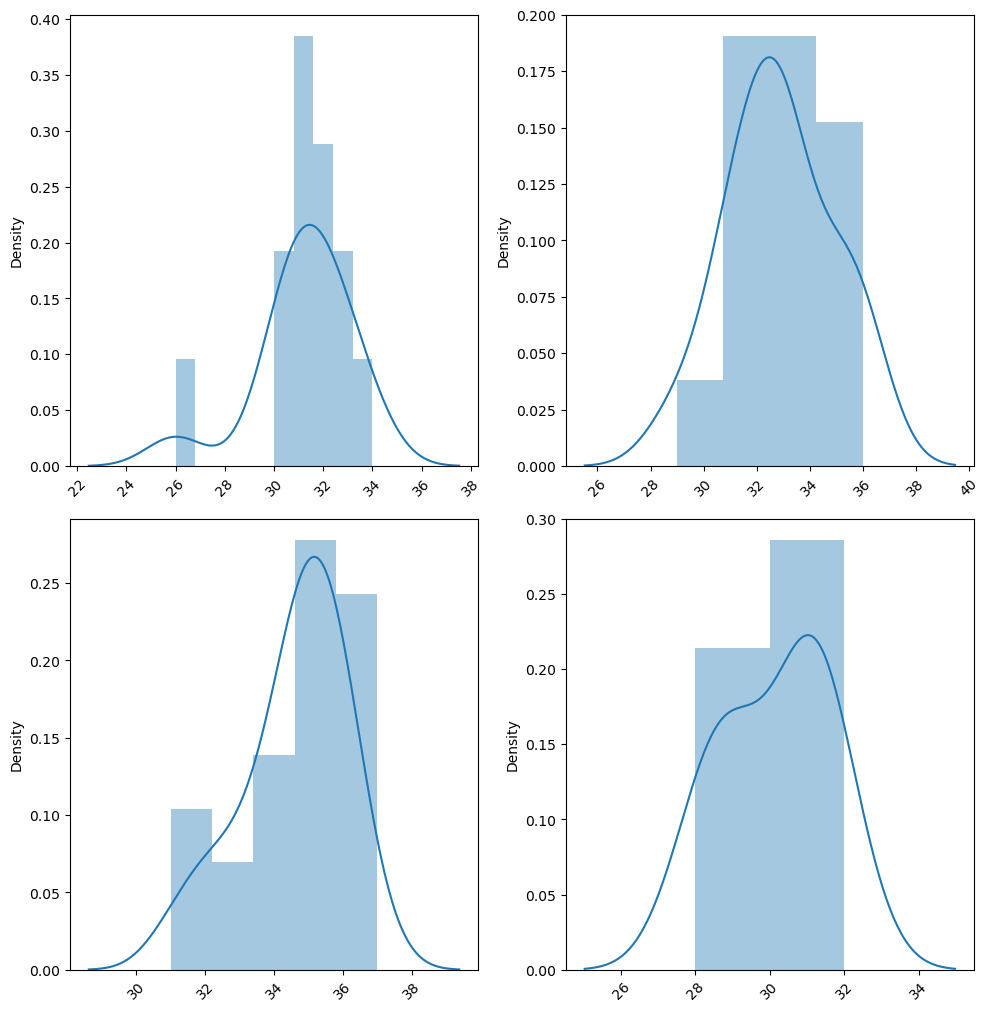

In [43]:
plt.figure(figsize=(10,30))
for i in df_bejaia['month'].unique():
    plt.subplot(6,2,i+1)
    sns.distplot(x=df_bejaia[(df_bejaia['month']==i) & (df_bejaia['Classes']==1)]['Temperature'])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [44]:
avg_RH=[]
for i in df_bejaia['month'].unique():
    avg_RH.append(df_bejaia[(df_bejaia['Classes']==1)&(df_bejaia['month']==i)]['RH'].mean())

In [45]:
avg_RH

[64.0, 65.8, 62.416666666666664, 62.57142857142857]

<AxesSubplot:xlabel='month', ylabel='RH'>

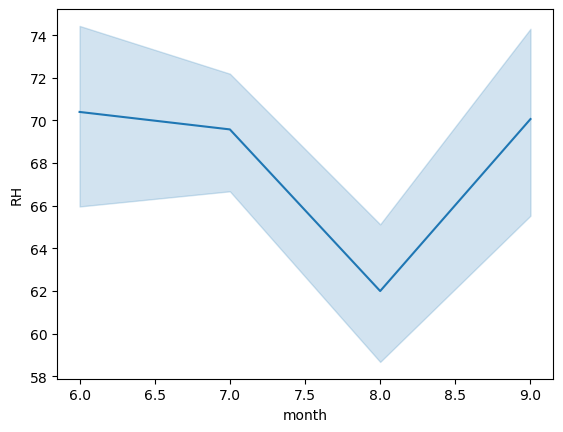

In [46]:
sns.lineplot(data=df_bejaia,x="month",y="RH")

### Report:
##### • 13,15,24,7 times fire was ingited in Bejaia in June,July,August,September months respectively.
##### • We can see that once RH value is less, more fires are happening because both was negatively correlated to each other.
##### • In August, the RH value is least as compared to other months which implies most fire occurences and the same has been observed too.
##### • In June, only once fire was ignited in Bejaia region when temperature was 26 degrees.
##### • We can see once there is no rain, the fires are occuring more frequently for obvious reason.
##### • The mean temperature at which fire was ignited is 31,32,34,30 degrees in June,July,August,September respectively.

## Analysis of SidiBel region

In [47]:
df_sidibel

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
125,1,6,2012,32.0,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0,0
126,2,6,2012,30.0,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0,0
127,3,6,2012,29.0,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0,0
128,4,6,2012,30.0,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0,0
129,5,6,2012,32.0,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30.0,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,0
243,27,9,2012,28.0,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,0
244,28,9,2012,27.0,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,0
245,29,9,2012,24.0,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,0


In [48]:
df_sidibel['month'].unique()

array([6, 7, 8, 9])

In [49]:
avg_temps1=[]
for i in df_sidibel['month'].unique():
    avg_temps1.append(df_sidibel[(df_sidibel['month']==i) & (df_sidibel['Classes']==1)]['Temperature'].mean())

In [50]:
avg_temps1

[33.75, 34.583333333333336, 36.592592592592595, 31.5]

In [51]:
no_fire_ign1 = []
for i in df_sidibel['month'].unique():
    no_fire_ign1.append(df_sidibel[(df_sidibel['month']==i) & (df_sidibel['Classes']==1)].shape[0])

In [52]:
no_fire_ign1

[12, 24, 27, 16]

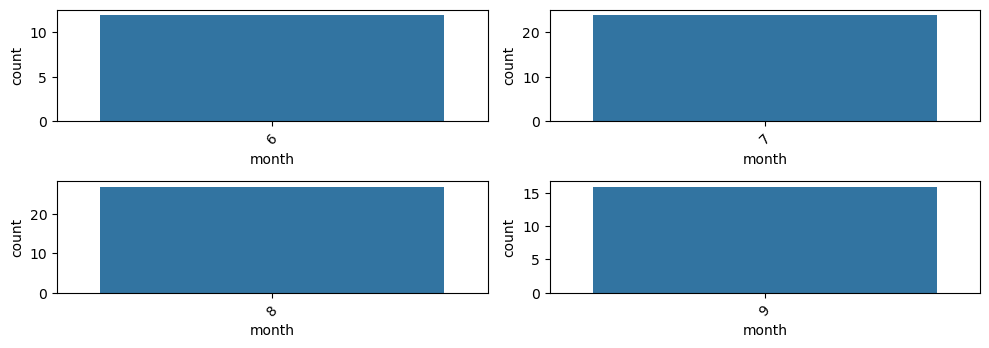

In [53]:
plt.figure(figsize=(10,10))
for i in df_sidibel['month'].unique():
    plt.subplot(6,2,i+1)
    sns.countplot(x=df_sidibel[(df_sidibel['month']==i)&(df_sidibel['Classes']==1)]['month'])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [54]:
df_sidibel[(df_sidibel['month']==8) & (df_sidibel['Classes']==0)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
186,1,8,2012,38.0,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,0,0
191,6,8,2012,30.0,54,14,3.1,70.5,11.0,9.1,1.3,10.5,0.8,0,0
192,7,8,2012,34.0,63,13,2.9,69.7,7.2,9.8,1.2,6.9,0.6,0,0
213,28,8,2012,35.0,56,14,0.4,79.2,37.0,166.0,2.1,30.6,6.1,0,0


### We can see from above cell that whenever rain has occured, there is no fire

In [55]:
ffmc=[]
for i in df_sidibel['month'].unique():
    ffmc.append(df_sidibel[(df_sidibel['month']==i) & (df_sidibel['Classes']==1)]['FFMC'].mean())

In [56]:
ffmc

[87.60833333333333, 87.41666666666667, 90.00370370370368, 87.10000000000002]

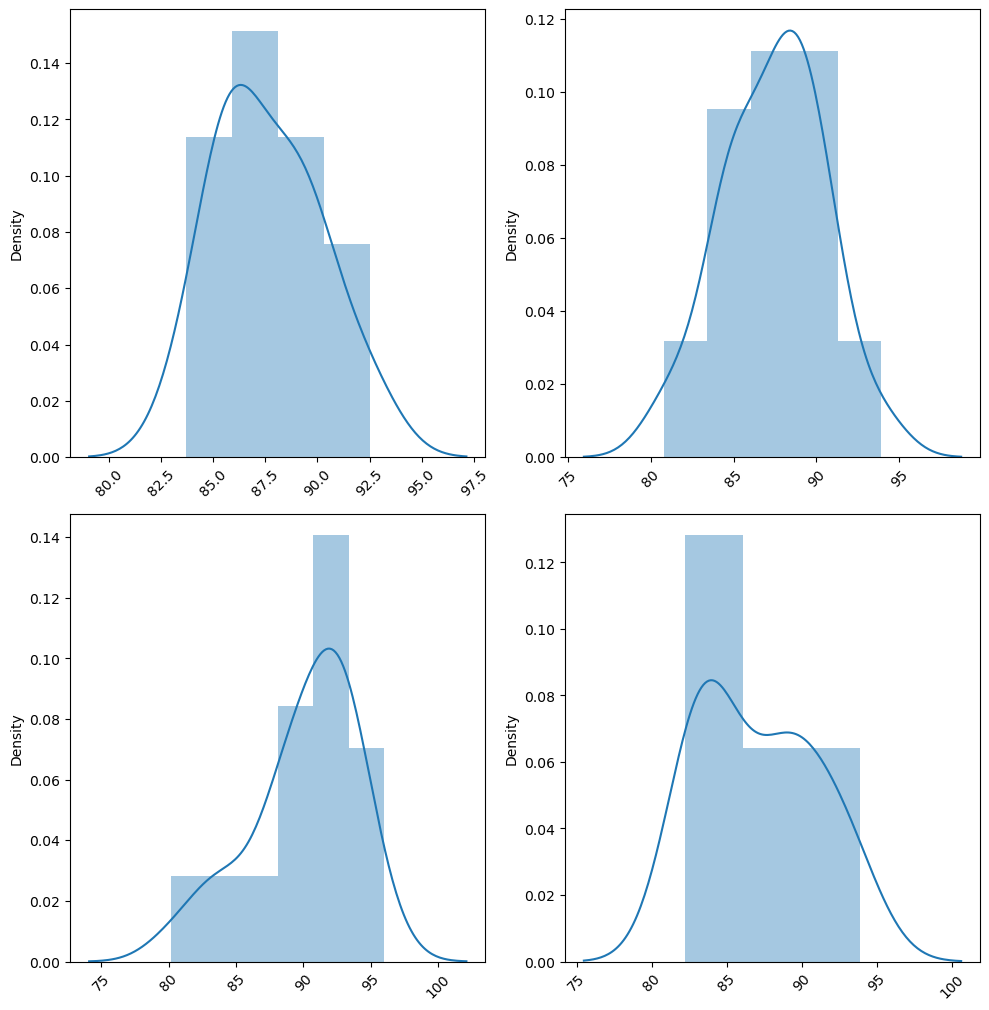

In [57]:
plt.figure(figsize=(10,30))
for i in df_sidibel['month'].unique():
    plt.subplot(6,2,i+1)
    sns.distplot(x=df_sidibel[(df_sidibel['month']==i) & (df_sidibel['Classes']==1)]['FFMC'])
    plt.xticks(rotation=45)
    plt.tight_layout()

<AxesSubplot:xlabel='month', ylabel='FFMC'>

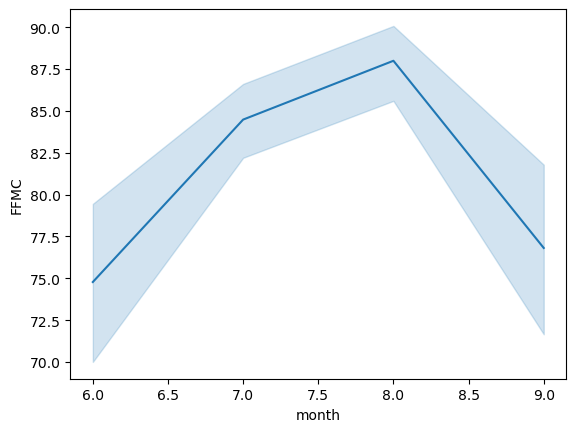

In [58]:
sns.lineplot(data=df_sidibel,x="month",y="FFMC")

<AxesSubplot:ylabel='Density'>

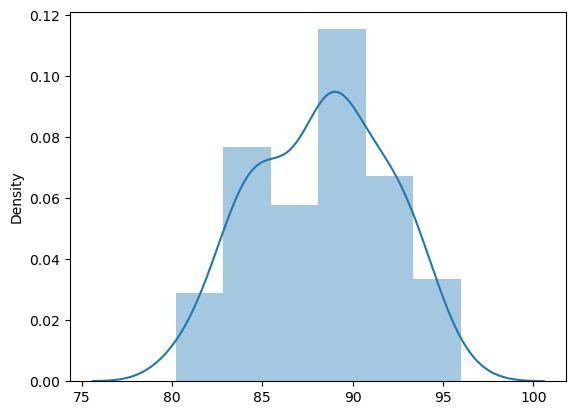

In [59]:
sns.distplot(x=df_sidibel[df_sidibel['Classes']==1]['FFMC'])

### Report
##### • FFMC and Classes are positively correlated which means if FFMC increases, chance of fire also increases.
##### • August has the highest mean FFMC which concludes that it must have observed most number of fire occurences 
##### which is true by observation also.
##### • We can see that Sidi-Bel region has comparitively higher average temperature than Bejaia region.
##### • We can see from above graphical representation that once FFMC > 80, fires are starting to occur in Sidi-Bel region 